# Business Understanding
This dataset cosists of the marks secured by the students in various subjects also their ethnicity and parent level of education.
 - What is the parental level of education of the first top 5 females with 100% score in reading.
 - What does the data suggest about race/ethnicity and their scores.
 - Did students who completed the test preparation course do well in their various subjects?

# Data Understanding
 We are going to import the dataframe obtained and use it to answer our questions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("StudentsPerformance.csv")
df.head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


### GATHER
This is showing us that we have 1000 rows and 8 coloumns.

In [3]:
df.shape

(1000, 8)

In [4]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

# Data preparation


As we can see from below there are no missing values in the dataset.We used the isnull function to check the missing values in the dataset but none was found as we can see below.All the numbers are (0)  if there were others apart from (0)then there would have been missing values.

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

This condition is given  to extract the records were the value is true ,if the value is true it shows us that that particular number is a female and if its false it shows us that its a male.

In [6]:
df['gender']=='female'

0       True
1       True
2       True
3      False
4      False
5       True
6       True
7      False
8      False
9       True
10     False
11     False
12      True
13     False
14      True
15      True
16     False
17      True
18     False
19      True
20     False
21      True
22     False
23      True
24     False
25     False
26     False
27      True
28     False
29      True
       ...  
970     True
971    False
972     True
973     True
974     True
975     True
976    False
977    False
978    False
979     True
980     True
981    False
982    False
983     True
984     True
985    False
986     True
987    False
988     True
989     True
990    False
991     True
992     True
993     True
994    False
995     True
996    False
997     True
998     True
999     True
Name: gender, Length: 1000, dtype: bool

The function below is showing us the performance of female students without any male in it,with their race,parental level of education and lunch.

In [7]:
df[df['gender']=='female']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
9,female,group B,high school,free/reduced,none,38,60,50
12,female,group B,high school,standard,none,65,81,73
14,female,group A,master's degree,standard,none,50,53,58
15,female,group C,some high school,standard,none,69,75,78
17,female,group B,some high school,free/reduced,none,18,32,28


# Data Analysis
### 1. What is the parental level of education of the first top 5 females with 100% score in reading.

First we have to write a function making it only female exclusive,removing all the males from the group,then we check the females reading scores from maximum to lowest.                                                                          After checking from the highest to lowest we noticed that there are lots of students who scored 100%in reading.
Then we write a function which will contain females with high reading scores and their parental level of education.

In [8]:
female=df[df['gender']=='female']

In [9]:
female.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


 now let us see the females with the maximum marks in reading score from the highest to the lowest.


In [10]:
female.sort_values(by=['reading score'],ascending=False).head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
165,female,group C,bachelor's degree,standard,completed,96,100,100
957,female,group D,master's degree,standard,none,92,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
712,female,group D,some college,standard,none,98,100,99
594,female,group C,bachelor's degree,standard,completed,92,100,99


It looks like there are alot of females with a 100 %mark in the reading score ,lets look at exactly how many.

In [11]:
max_gender_reading=female[female['reading score']==100]

In [12]:
max_gender_reading

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99
712,female,group D,some college,standard,none,98,100,99
886,female,group E,associate's degree,standard,completed,93,100,95


In [13]:
 female_max_gender=female.sort_values(by=['reading score'],ascending=False)

In [14]:
female_max_gender.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
165,female,group C,bachelor's degree,standard,completed,96,100,100
957,female,group D,master's degree,standard,none,92,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
712,female,group D,some college,standard,none,98,100,99
594,female,group C,bachelor's degree,standard,completed,92,100,99


<Container object of 5 artists>

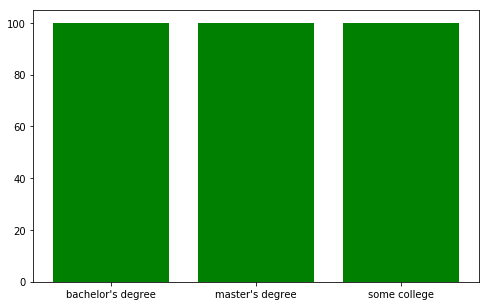

In [15]:
plt.figure(figsize=(8,5))
plt.bar(list(female_max_gender['parental level of education'])[0:5],list(female_max_gender['reading score'])[0:5],color='g')

We can see from the bar graph above that the top 5 females in reading with 100% parents have bachelors,masters and some college degrees if we look at the graph well we will notice that it doesn't have 3 of the degrees in the dataset because they aren't part of the top 5.

### 2. What does the data suggest about race/ethnicity and their scores.

we are going to investigate the scores of each ethnicity/race with their performance.

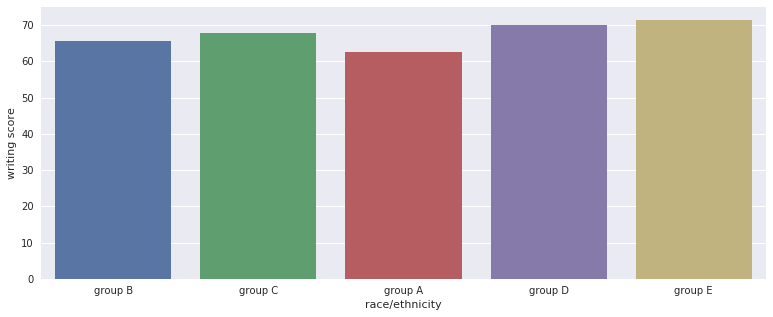

In [16]:
sns.set(rc={'figure.figsize':(13,5)})
sns.barplot(x='race/ethnicity',y='writing score',data=df,ci=None)

Looking at the barplot for the reading score even though the marks increased group E is still leading followed by groups(D,C,B and A)respectfully.

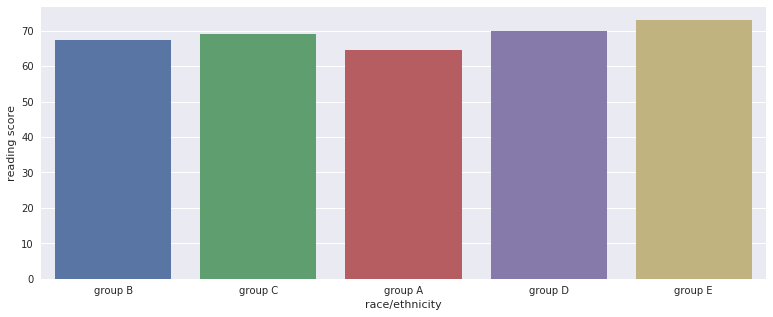

In [17]:
sns.set(rc={'figure.figsize':(13,5)})
sns.barplot(x='race/ethnicity',y='reading score',data=df,ci=None)

Looking at the barplot for the reading score even though the marks increased group E is still leading followed by groups(D,C,B and A)respectfully.

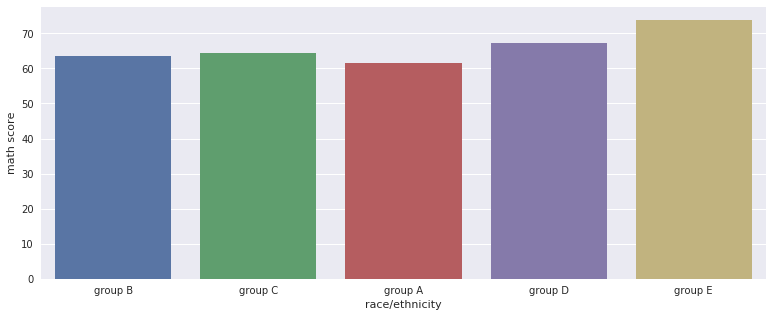

In [18]:
sns.set(rc={'figure.figsize':(13,5)})
sns.barplot(x='race/ethnicity',y='math score',data=df,ci=None)

It looks likes group E had the highest again in the math followed by D,B,C then A

 ### 3.Did students who completed the test preparation course do well in their various subjects?

We are going to check each subject score and see if it was important for students to take the test preparation course or not.

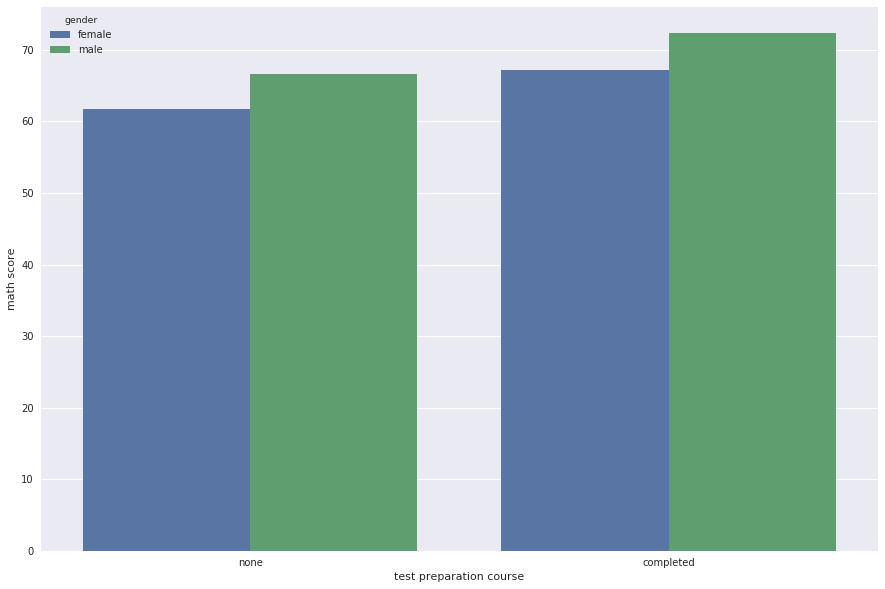

In [19]:
sns.set(rc={'figure.figsize':(15,10)})                                        
sns.barplot(x='test preparation course',y='math score',hue='gender',data=df,ci=None)

For math score we can see that students who took the preparation course did well then students who didn't complete the preparation course.Also more males didn't complete the course to females ,but lots of males did better than females in math.

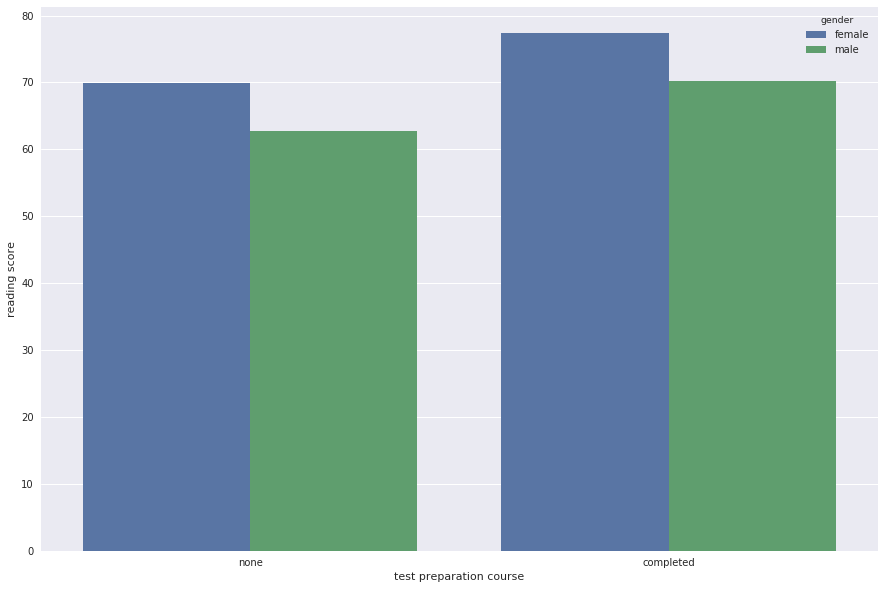

In [50]:
sns.set(rc={'figure.figsize':(15,10)})                                        
sns.barplot(x='test preparation course',y='reading score',hue='gender',data=df,ci=None)

For reading more females who took the test passed more than the males ,females who did not also take the course passed more than the males.

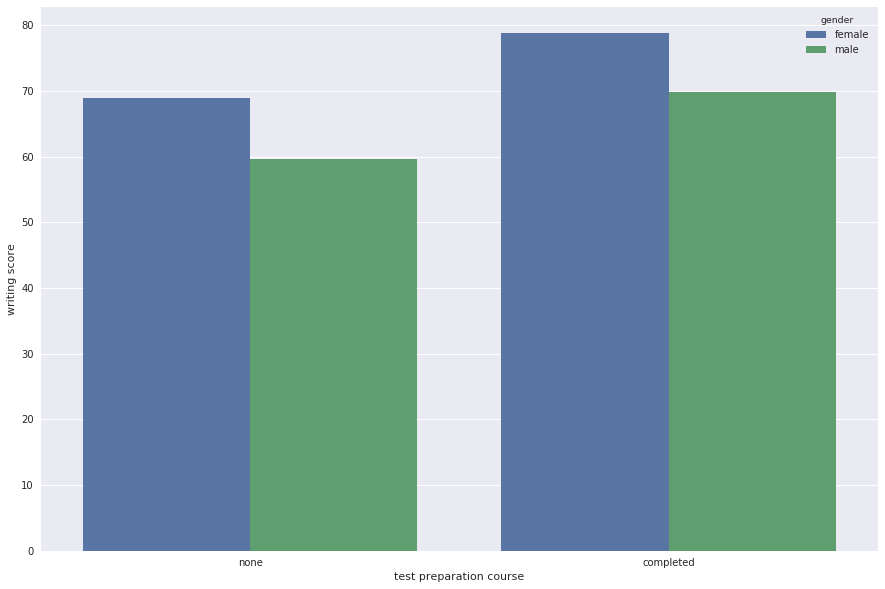

In [51]:
sns.set(rc={'figure.figsize':(15,10)})                                        
sns.barplot(x='test preparation course',y='writing score',hue='gender',data=df,ci=None)

For our writing course we can see that students who took the preparation course scored higher than those who did not.